In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving globalterrorismdb.csv to globalterrorismdb (1).csv


In [0]:
attack = pd.read_csv('globalterrorismdb.csv',encoding='ISO-8859-1', low_memory=False)
pd.set_option('display.max_columns',None)
#attack

In [0]:
attack.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
attack = attack[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
#attack['casualities'] = attack['Killed'] + attack['Wounded']
killed = attack['Killed']
#killed = killed.fillna(killed.mean())
alpha = 3
wounded = attack['Wounded']
group_name = attack['Group']
#wounded = wounded.fillna(wounded.mean())
ss = attack[['Killed','Wounded']]
ss_modified = ss.fillna(ss.mean())
#ss_modified

In [0]:
ss_modified_new = pd.concat([ss_modified, group_name], axis=1)
#ss_modified_new

In [6]:
grouped = ss_modified_new.groupby('Group')
#grouped = df.groupby('Year')
v1 = grouped['Killed'].agg(np.sum)
v2 = grouped['Wounded'].agg(np.sum)
ss_modified_new_updated = pd.concat([v1, v2], axis=1)
ss_modified_new_updated

,Killed,Wounded
Group,,
1 May,2.000000,0.000000
14 K Triad,0.000000,0.000000
14 March Coalition,5.000000,80.000000
14th of December Command,0.000000,0.000000
15th of September Liberation Legion,0.000000,1.000000
16 January Organization for the Liberation of Tripoli,1.000000,32.000000
1920 Revolution Brigades,15.000000,19.000000
19th of July Christian Resistance Brigade,1.000000,0.000000
1st of May Group,2.403272,3.167668


Text(0, 0.5, 'lethality')

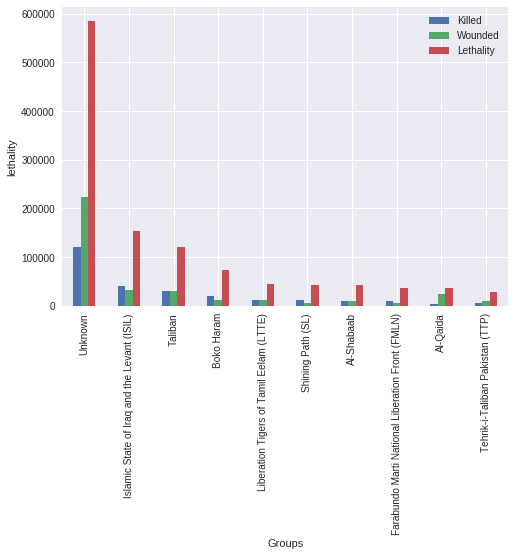

In [11]:
lethal = alpha*ss_modified_new_updated['Killed'] + ss_modified_new_updated['Wounded']
ss_modified_new_updated_new = pd.concat([ss_modified_new_updated, lethal], axis=1)
#ss_modified_new_updated_new
symbols = ['Killed', 'Wounded', 'Lethality']
ss_modified_new_updated_new.columns = symbols
#ss_modified_new_updated_new
#lethal_sort = lethal.sort()
lethality = ss_modified_new_updated_new.sort_values('Lethality', ascending=False)
#test
lethal_plot = lethality.head(10)
lethal_plot.plot(kind = 'bar')
plt.xlabel('Groups')
plt.ylabel("lethality")